In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
arquivo = "testsmells_202601061427.csv"  # Substitua pelo nome do seu arquivo
dados = pd.read_csv(arquivo)


# Dicionário de mapeamento das siglas
siglas = {
    "Assertion Roulette": "AR",
    "Conditional Test Logic": "CTL",
    "Duplicate Assert": "DA",
    "Empty Test": "ET",
    "Exception Handling": "EH",
    "Ignored Test": "IT",
    "Magic Number": "MN",
    "Print Statment Fixture": "PSF",
    "Resource Optimism": "RO",
    "Sensitive Equality": "SE",
    "Sleepy Fixture": "SF",
    "Test Without Description": "TWD",
    "Unknown Test": "UT",
    "Verbose Test": "VT"
}

# Substituir os nomes dos Test Smells pelas siglas
dados['testsmell'] = dados['testsmell'].replace(siglas)

dados = dados.drop_duplicates()

# Verificar as primeiras linhas para garantir que foi importado corretamente
print(dados.head())

# Criar a tabela binária (1 se o testsmell está presente no path, 0 caso contrário)
tabela_binaria = pd.crosstab(dados['path'], dados['testsmell'])

print(tabela_binaria)




                                                 path testsmell
0   /home/tassio/.dnose/projects/100ms-flutter/pac...        DA
3   /home/tassio/.dnose/projects/100ms-flutter/pac...        AR
6   /home/tassio/.dnose/projects/100ms-flutter/sam...        DA
9   /home/tassio/.dnose/projects/100ms-flutter/sam...        AR
12  /home/tassio/.dnose/projects/100ms-flutter/sam...        DA
testsmell                                           AR  CTL  DA  EH  ET  IT  \
path                                                                          
/home/tassio/.dnose/projects/100ms-flutter/pack...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
...                                                 ..  ...  ..

In [13]:


# Converter para valores binários (1 se presente, 0 caso contrário)
# tabela_binaria = tabela_binaria.gt(0).astype(int)

# Calcular a matriz de coocorrência
matriz_coocorrencia2 = np.dot(tabela_binaria.T, tabela_binaria)

matriz_coocorrencia = tabela_binaria.T.dot(tabela_binaria)

# Normalizar a matriz para o intervalo de 0 a 1
matriz_coocorrencia_normalizada = matriz_coocorrencia / matriz_coocorrencia.max()

# Converter para DataFrame para facilitar a visualização
coocorrencia_df = pd.DataFrame(
    matriz_coocorrencia,
    index=tabela_binaria.columns,
    columns=tabela_binaria.columns
)

# Converter para DataFrame
coocorrencia_df_norm = pd.DataFrame(
    matriz_coocorrencia_normalizada,
    index=tabela_binaria.columns,
    columns=tabela_binaria.columns
)




# Exibir a matriz de coocorrência
print("Matriz de Coocorrência:")
print(coocorrencia_df)

# (Opcional) Salvar a matriz em um arquivo CSV
coocorrencia_df.to_csv("matriz_coocorrencia.csv")

Matriz de Coocorrência:
testsmell     AR   CTL     DA    EH   ET   IT     MN  PSF    RO    SE   SF  \
testsmell                                                                    
AR         12691  2249  10881   959   59  107   8546  372   599  1217  437   
CTL         2249  2791   2471   496   25   57   2312  260   231   384  223   
DA         10881  2471  13136   998   60  123   8729  536   778  1234  464   
EH           959   496    998  1141   14   18    917  122    94   281  153   
ET            59    25     60    14  433   10     53    6     9     9    3   
IT           107    57    123    18   10  136    109   19    21     8   10   
MN          8546  2312   8729   917   53  109  11132  499   623  1092  421   
PSF          372   260    536   122    6   19    499  654    74    82   51   
RO           599   231    778    94    9   21    623   74  1107    72   34   
SE          1217   384   1234   281    9    8   1092   82    72  1488   63   
SF           437   223    464   153    3

In [14]:
# Exibir a matriz de coocorrência
print("Matriz de Coocorrência:")
print(coocorrencia_df_norm)

# (Opcional) Salvar a matriz em um arquivo CSV
coocorrencia_df_norm.to_csv("matriz_coocorrencia_norm.csv")

Matriz de Coocorrência:
testsmell        AR       CTL        DA        EH        ET        IT  \
testsmell                                                               
AR         1.000000  0.805804  0.828334  0.840491  0.136259  0.786765   
CTL        0.177212  1.000000  0.188109  0.434706  0.057737  0.419118   
DA         0.857379  0.885346  1.000000  0.874671  0.138568  0.904412   
EH         0.075565  0.177714  0.075974  1.000000  0.032333  0.132353   
ET         0.004649  0.008957  0.004568  0.012270  1.000000  0.073529   
IT         0.008431  0.020423  0.009364  0.015776  0.023095  1.000000   
MN         0.673391  0.828377  0.664510  0.803681  0.122402  0.801471   
PSF        0.029312  0.093157  0.040804  0.106924  0.013857  0.139706   
RO         0.047199  0.082766  0.059227  0.082384  0.020785  0.154412   
SE         0.095895  0.137585  0.093940  0.246275  0.020785  0.058824   
SF         0.034434  0.079900  0.035323  0.134093  0.006928  0.073529   
TWD        0.002600  0.0021

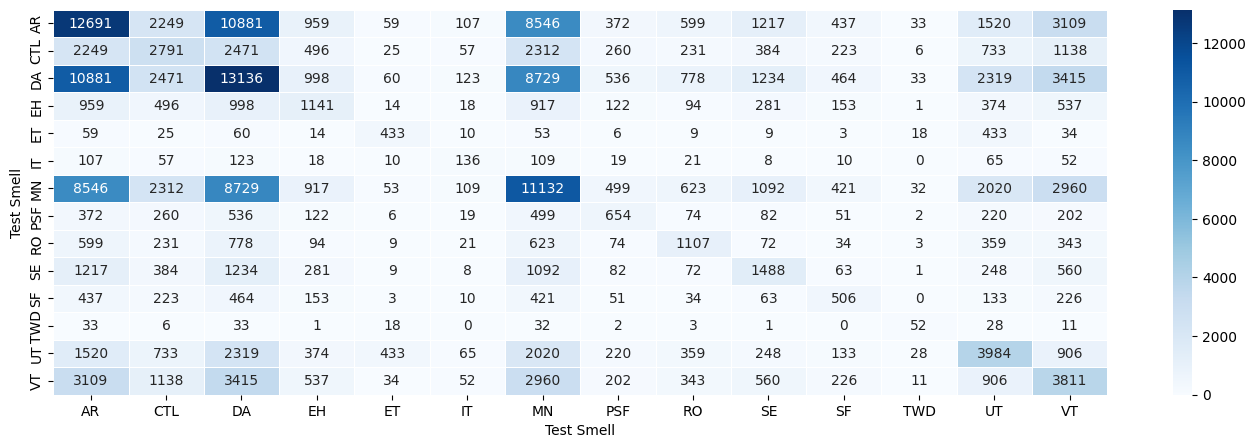

In [15]:
# Criar o gráfico de calor
plt.figure(figsize=(17, 5))
# sns.heatmap(coocorrencia_df, annot=True, fmt="d", cmap="Blues", cbar=True)

# Criar uma máscara para os valores zero
mask = coocorrencia_df == 0

sns.heatmap(
    coocorrencia_df, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    cbar=True, 
    # mask=mask, 
    linewidths=0.5,  # Para separar os valores zero
    linecolor="white"  # Cor das linhas da grade
)

# plt.title("Matriz de Coocorrência dos Test Smells")
plt.ylabel("Test Smell")
plt.xlabel("Test Smell")

# Salvar o gráfico como um arquivo PNG
plt.savefig("matriz_coocorrencia_norm.png", format="png")

plt.show()


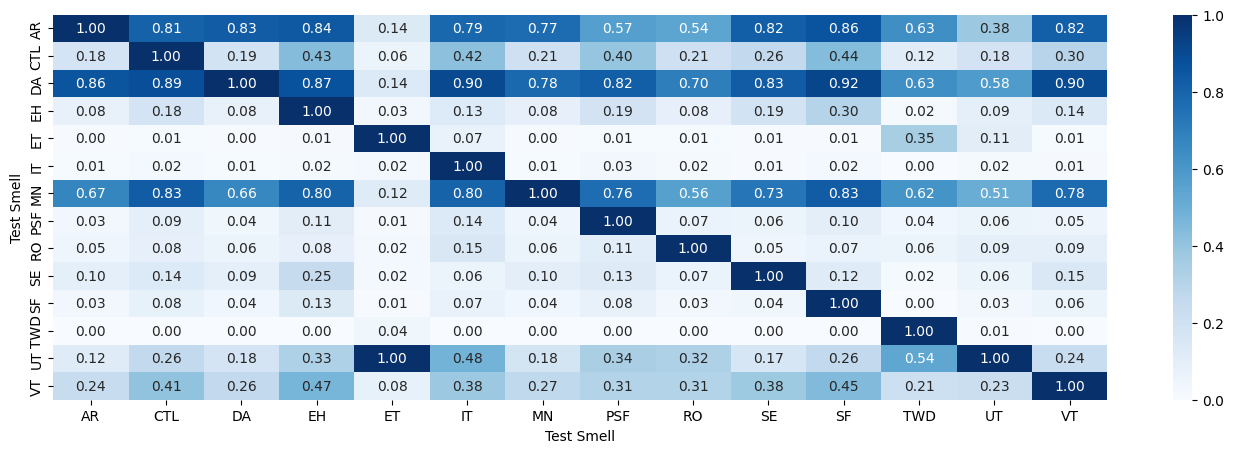

In [16]:
# Criar o gráfico de calor
plt.figure(figsize=(17, 5))
sns.heatmap(coocorrencia_df_norm, annot=True, fmt=".2f", cmap="Blues", cbar=True)
# plt.title("Matriz de Coocorrência Normalizada dos Test Smells")
plt.ylabel("Test Smell")
plt.xlabel("Test Smell")

# Salvar o gráfico como um arquivo PNG
plt.savefig("matriz_coocorrencia_norm.png", format="png")

plt.show()


In [17]:

# Salvar os dados da matriz de coocorrência normalizada em CSV
coocorrencia_df_norm.to_csv("matriz_coocorrencia_norm.csv", index=True)


In [18]:


# import pandas as pd
# import numpy as np

# # Exemplo de dados
# dados = pd.DataFrame({
#     'path': ['file1','file1', 'file1', 'file2', 'file3', 'file3', 'file3'],
#     'testsmell': ['Assertion Roulette','Assertion Roulette', 'Magic Number', 'Assertion Roulette', 'Magic Number', 'Verbose Test', 'Assertion Roulette']
# })

# import pandas as pd

# # Remover linhas duplicadas com base em todas as colunas
# dados = dados.drop_duplicates()


# # Passo 1: Criar a tabela binária (1 se o testsmell está presente no path, 0 caso contrário)
# tabela_binaria = pd.crosstab(dados['path'], dados['testsmell'])

# # Passo 2: Calcular a matriz de coocorrência
# matriz_coocorrencia = tabela_binaria.T.dot(tabela_binaria)

# # Exibir a matriz de coocorrência
# print("Matriz de Coocorrência:")
# print(matriz_coocorrencia)
